<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/2203a52117/blob/main/capston_project(statml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#normalisation
features=data.drop(columns=['HeartDisease'],axis=1)
target=data['HeartDisease']
data['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
data['ChestPainType'].replace({'ATA': 0, 'NAP': 1,'ASY':2,'TA':3}, inplace=True)
data['RestingECG'].replace({'Normal': 0, 'ST': 1,'LVH':2}, inplace=True)
data['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
data['ST_Slope'].replace({'Up': 0, 'Flat': 1,'Down':2}, inplace=True)
x=data.drop(columns='HeartDisease',axis=1)
y=data['HeartDisease']
data.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


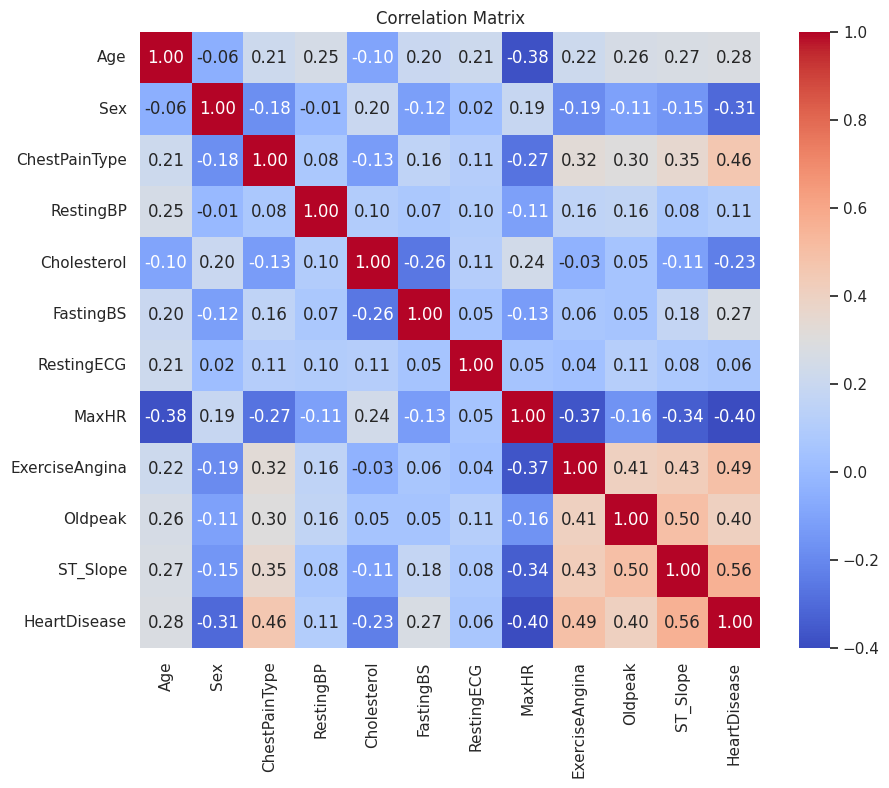

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#minmax scaling
scalar=MinMaxScaler()
scalar.fit(x)
x_scaled=scalar.transform(x)
print(x_scaled)
features=x_scaled
target=data['HeartDisease']
print(features)
print(target)

[[0.24489796 0.         0.         ... 0.         0.29545455 0.        ]
 [0.42857143 1.         0.33333333 ... 0.         0.40909091 0.5       ]
 [0.18367347 0.         0.         ... 0.         0.29545455 0.        ]
 ...
 [0.59183673 0.         0.66666667 ... 1.         0.43181818 0.5       ]
 [0.59183673 1.         0.         ... 0.         0.29545455 0.5       ]
 [0.20408163 0.         0.33333333 ... 0.         0.29545455 0.        ]]
[[0.24489796 0.         0.         ... 0.         0.29545455 0.        ]
 [0.42857143 1.         0.33333333 ... 0.         0.40909091 0.5       ]
 [0.18367347 0.         0.         ... 0.         0.29545455 0.        ]
 ...
 [0.59183673 0.         0.66666667 ... 1.         0.43181818 0.5       ]
 [0.59183673 1.         0.         ... 0.         0.29545455 0.5       ]
 [0.20408163 0.         0.33333333 ... 0.         0.29545455 0.        ]]
0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDi

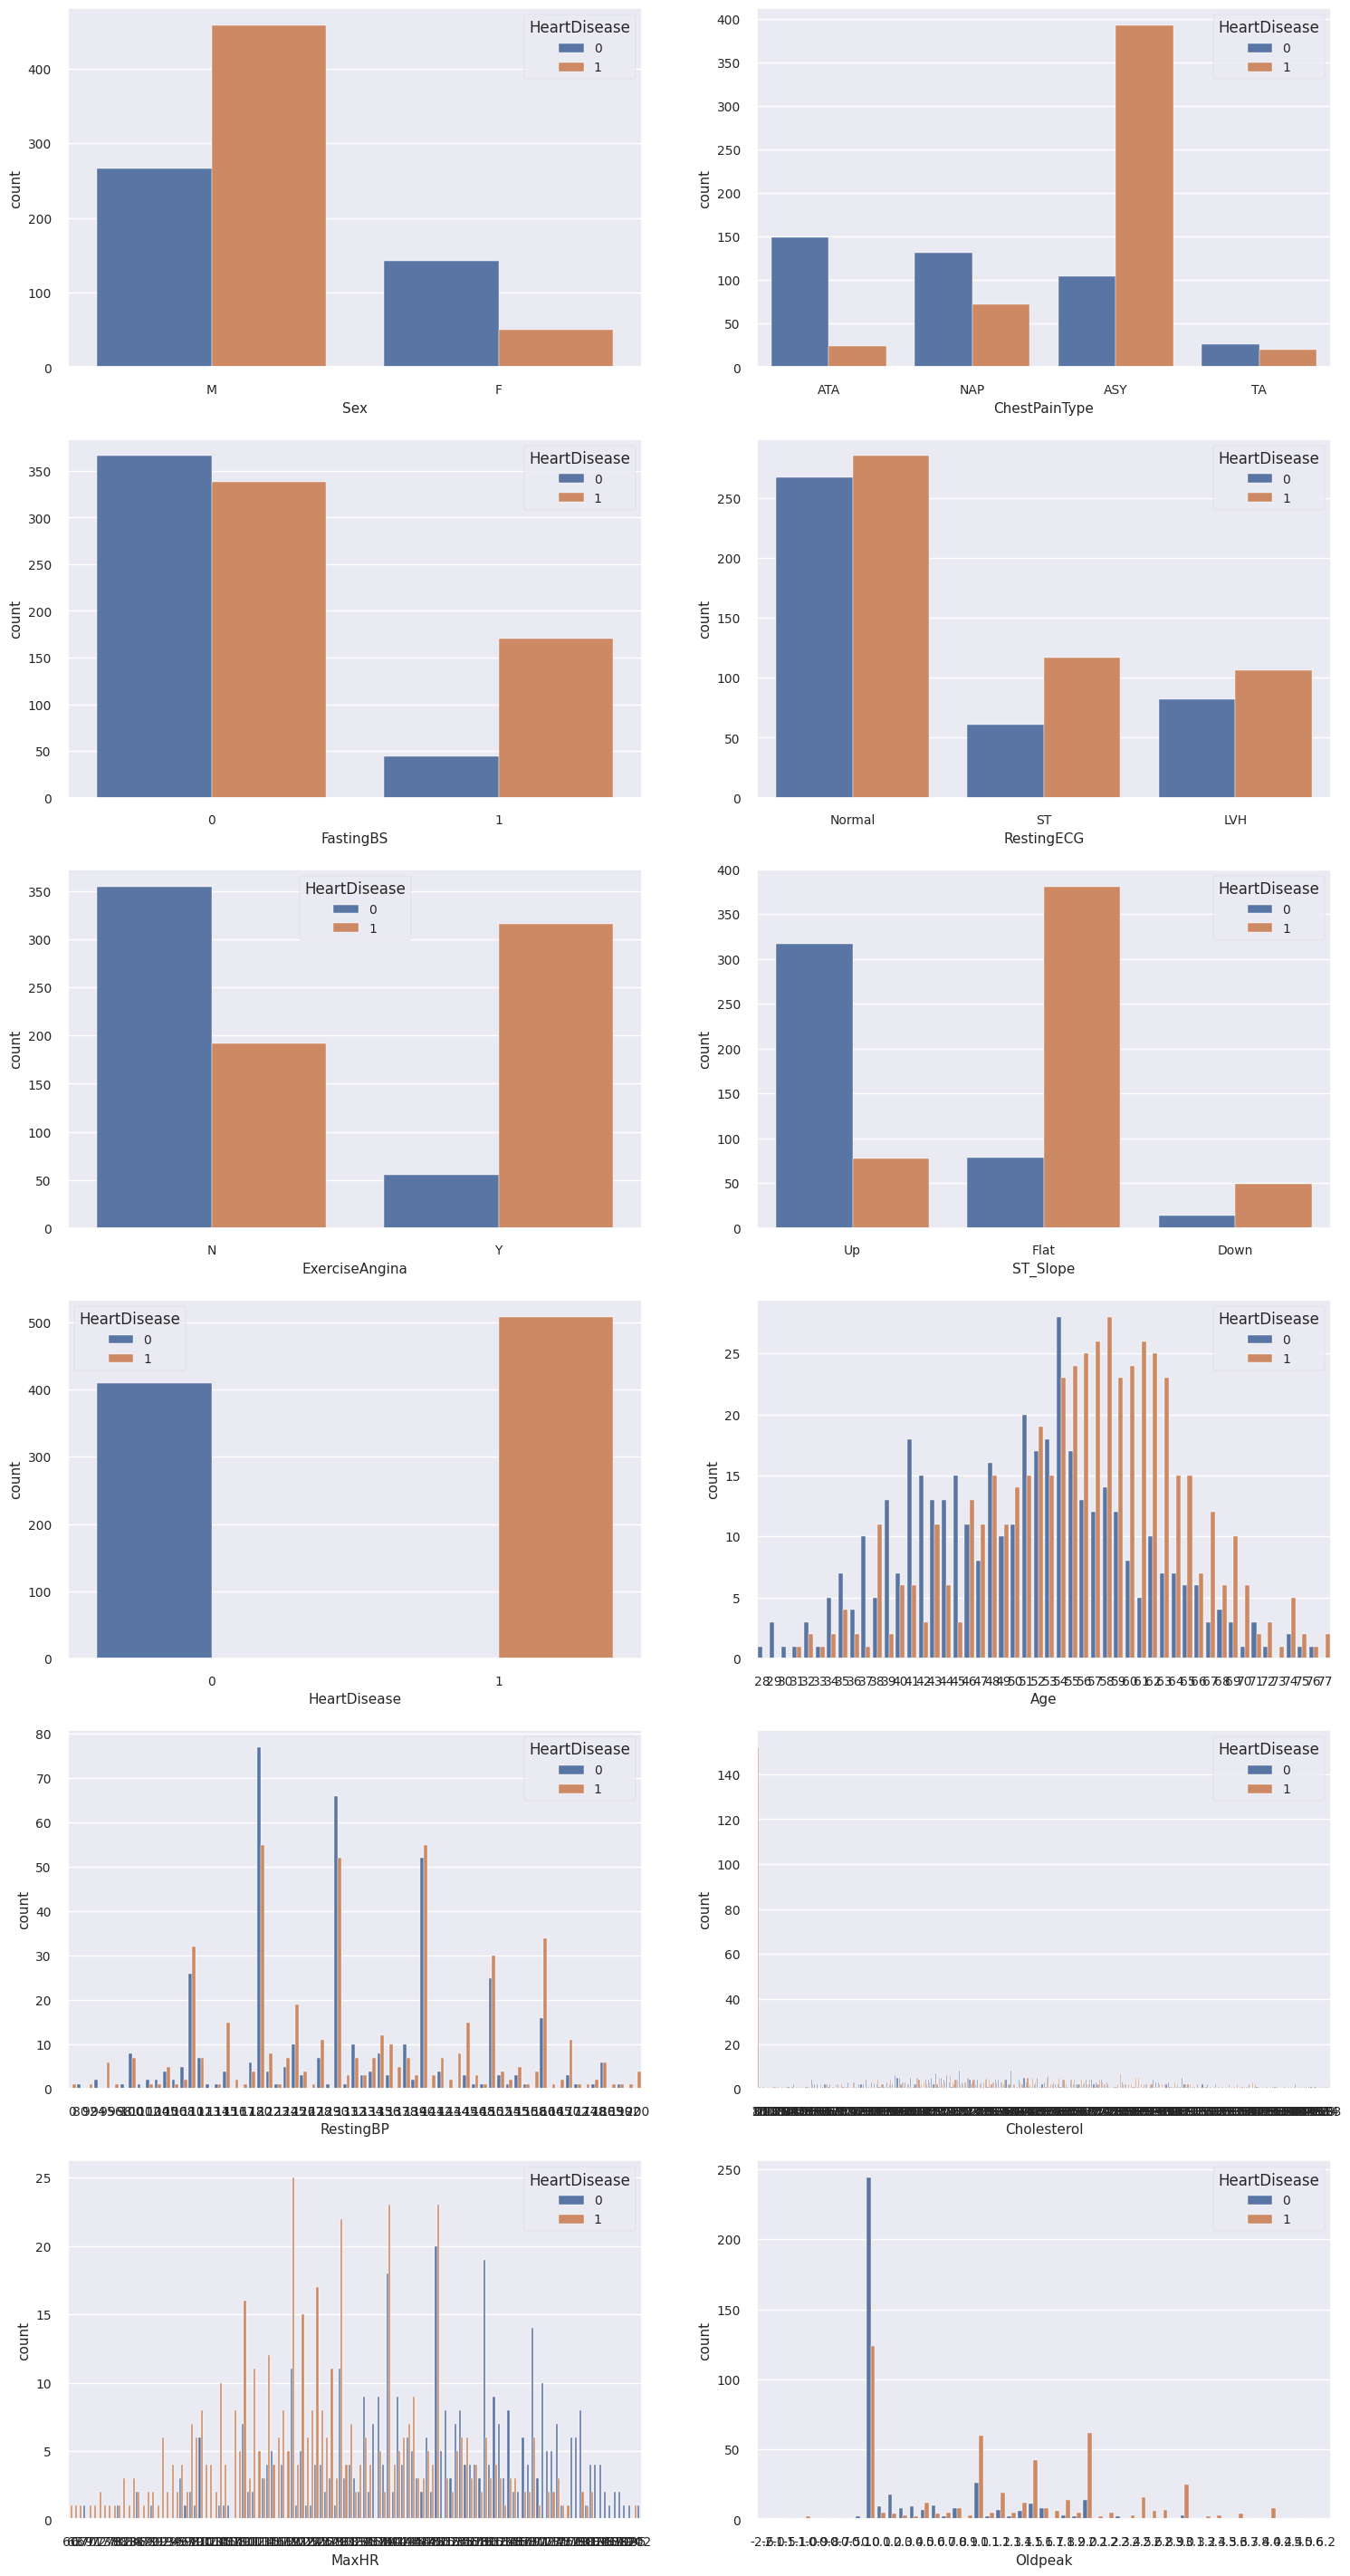

In [ ]:
discrete_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
                     'HeartDisease','Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.style.use(plt.style.available[19])
num_discrete_features = len(discrete_features)
rows = (num_discrete_features + 1) // 2
cols = 2
plt.figure(figsize=(18, 6 * rows))
for i, feature in enumerate(discrete_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=data[feature], hue=data['HeartDisease'])
plt.show()

In [ ]:
print("X.SHAPE=",x.shape)
print("X_TEST.SHAPE=",x_test.shape)
print("X_TRAIN.SHAPE=",x_train.shape)
print("Y_TEST.SHAPE=",y_test.shape)
print("Y_TRAIN.SHAPE=",y_train.shape)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
# before pca

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)

Initial Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        85
           1       0.84      0.91      0.87        99

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion Matrix:
[[68 17]
 [ 9 90]]


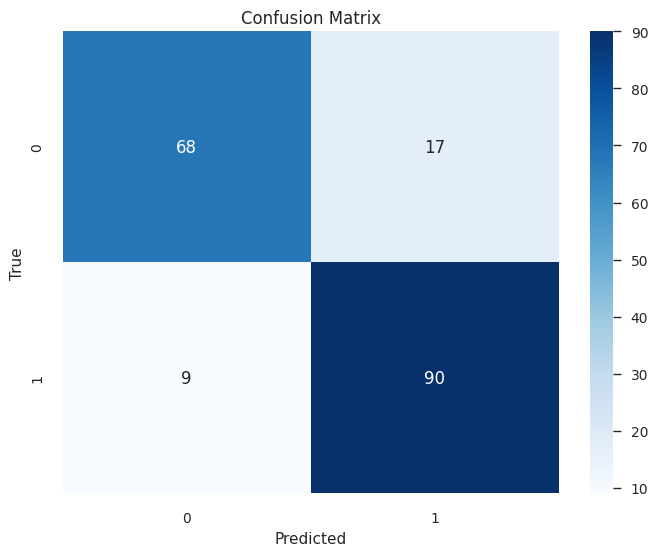

Mean Accuracy (Bootstrapped): 0.54
95% Confidence Interval: 0.38 - 0.66
Coefficient of Variation: 11.67%
Standard Deviation of Accuracy: 0.06
Mean Square Error: 0.00
The model is not consistent.


In [ ]:
#svm and bootstrapping
svm_classifier = SVC(kernel='linear', random_state=2)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

num_bootstrap_samples = 1000
accuracies = []

for _ in range(num_bootstrap_samples):
    sample_indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train
    y_bootstrap = y_train.values[sample_indices]
    svm_classifier.fit(x_bootstrap, y_bootstrap)
    y_pred_bootstrap = svm_classifier.predict(x_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")


Initial Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        85
           1       0.83      0.87      0.85        99

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

Confusion Matrix:
[[68 17]
 [13 86]]


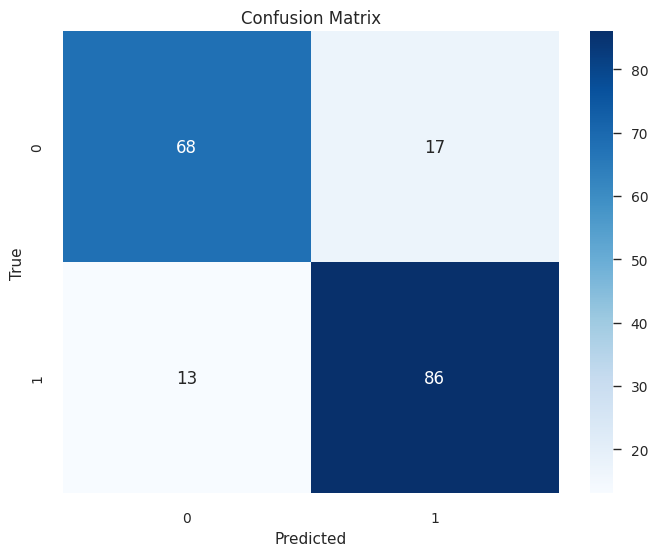

Mean Accuracy (Bootstrapped): 0.51
95% Confidence Interval: 0.26 - 0.75
Coefficient of Variation: 21.71%
Standard Deviation of Accuracy: 0.11
Mean Square Error: 0.01
The model is not consistent.


In [ ]:
#percaptron and bootstrapping
perceptron_model = Perceptron()
perceptron_model.fit(x_train, y_train)
y_pred = perceptron_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bootstrapping to assess model consistency
num_bootstrap_samples = 1000
accuracies = []

for _ in range(num_bootstrap_samples):
    sample_indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train
    y_bootstrap = y_train.values[sample_indices]
    perceptron_model.fit(x_bootstrap, y_bootstrap)
    y_pred_bootstrap = perceptron_model.predict(x_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")


<ipython-input-40-2f8f57ff41cc>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Initial Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        85
           1       0.84      0.90      0.87        99

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
[[68 17]
 [10 89]]


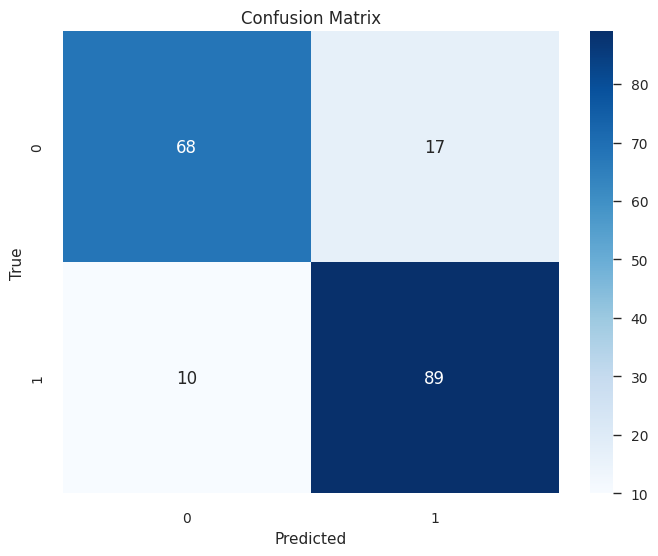

Mean Accuracy (Bootstrapped): 0.53
95% Confidence Interval: 0.38 - 0.67
Coefficient of Variation: 12.81%
Standard Deviation of Accuracy: 0.07
Mean Square Error: 0.00
The model is not consistent


In [ ]:
#logistic regression and bootstrapping
def logistic_regression(data):
    data = data.fillna(data.mean())
    if data['HeartDisease'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Initial Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    num_bootstrap_samples = 1000
    accuracies = []

    for _ in range(num_bootstrap_samples):
        sample_indices = np.random.choice(len(x_train), len(x_train), replace=True)
        x_bootstrap = x_train
        y_bootstrap = y_train.values[sample_indices]
        logistic_reg.fit(x_bootstrap, y_bootstrap)
        y_pred_bootstrap = logistic_reg.predict(x_test)
        accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
        accuracies.append(accuracy_bootstrap)
    mean_accuracy = np.mean(accuracies)
    confidence_interval = np.percentile(accuracies, [2.5, 97.5])
    print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
    print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
    coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
    print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
    std_accuracy = np.std(accuracies)
    print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
    mse = np.mean((accuracies - mean_accuracy) ** 2)
    print(f"Mean Square Error: {mse:.2f}")
    if std_accuracy < 0.02 and coefficient_of_variation < 5:
        print("The model is consistent.")
    else:
        print("The model is not consistent")

logistic_regression(data)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Confusion Matrix:
[[41  5]
 [11 35]]


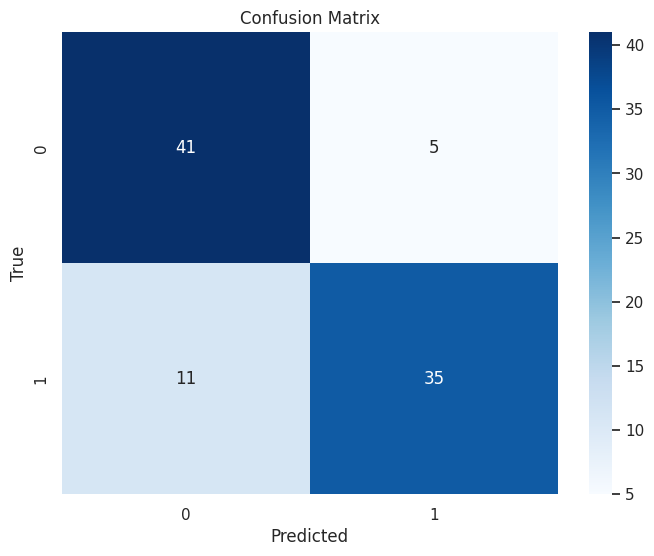

Confusion Matrix:
[[41  5]
 [11 35]]
Accuracy of the Perceptron Model: 0.52
Mean Accuracy (Bootstrapped): 0.50
95% Confidence Interval: 0.27 - 0.73
Coefficient of Variation: 20.14%
Standard Deviation of Accuracy: 0.10
Mean Square Error: 0.01
The model is not consistent


In [ ]:
# Define the perceptron function (mamually)
import random as rd
def perceptron(weights, bias, x_test):
    y_pred = []
    for i in range(len(x_test)):
        z = np.dot(weights, x_test[i]) + bias
        s = 1 / (1 + np.exp(-z))
        if s >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred
rd.seed(19)
weights = [rd.uniform(-1, 1) for _ in range(x_train.shape[1])]
bias = rd.uniform(-1, 1)
y_pred_perceptron = perceptron(weights, bias, x_test)
print(y_pred_perceptron)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)
print(f'Accuracy of the Perceptron Model: {accuracy_perceptron:.2f}')
num_bootstrap_samples = 1000
accuracies = []
for _ in range(num_bootstrap_samples):
    sample_indices = np.random.choice(len(x_train), len(x_train), replace=True)
    x_bootstrap = x_train
    y_bootstrap = y_train.values[sample_indices]
    perceptron_model.fit(x_bootstrap, y_bootstrap)
    y_pred_bootstrap = perceptron_model.predict(x_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
        print("The model is consistent.")
else:
        print("The model is not consistent")

Accuracy Scores for Different Values of k:
[0.8586956521739131, 0.8641304347826086, 0.8641304347826086, 0.8478260869565217, 0.8369565217391305, 0.8641304347826086, 0.8695652173913043, 0.8695652173913043, 0.875, 0.8586956521739131, 0.8641304347826086, 0.8641304347826086, 0.8641304347826086, 0.8586956521739131, 0.8532608695652174, 0.8532608695652174, 0.8478260869565217, 0.8478260869565217, 0.842391304347826]


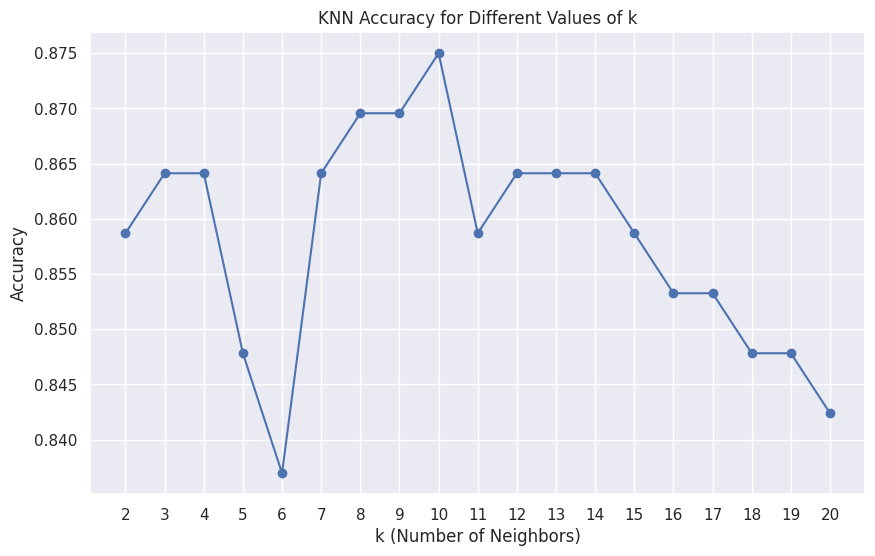

The best k value is 10 with an accuracy of 0.88
Mean Accuracy (Bootstrapped): 0.85
95% Confidence Interval: 0.82 - 0.88
Coefficient of Variation: 2.03%
Standard Deviation of Accuracy: 0.02
Mean Square Error: 0.00
The model is consistent.
Confusion Matrix:
[[65 20]
 [ 9 90]]


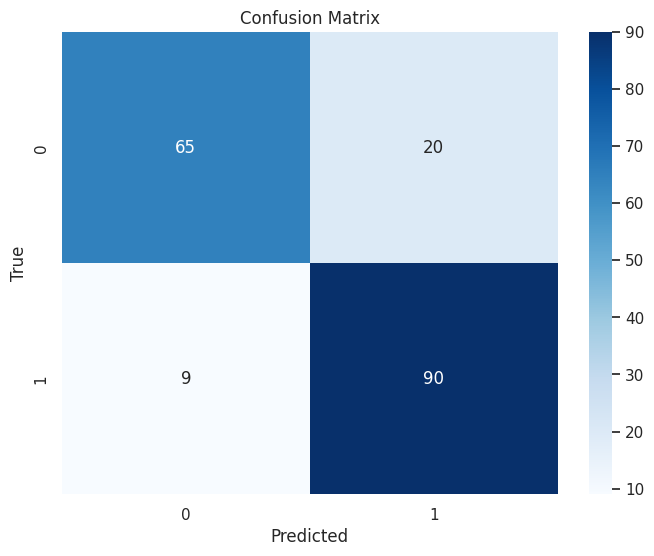

In [ ]:
#knn and bootstrapping
k_values = list(range(2, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("Accuracy Scores for Different Values of k:")
print(accuracy_scores)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best k value is {best_k} with an accuracy of {max(accuracy_scores):.2f}")
num_bootstrap_samples = 1000
accuracies = []

for _ in range(num_bootstrap_samples):
    bootstrap_indices = np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)
    x_bootstrap = X_train[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]
    knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
    knn.fit(x_bootstrap, y_bootstrap)
    y_pred_bootstrap = knn.predict(X_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Explained Variance Ratio: [0.2619465  0.13093813 0.10559427 0.08904884]


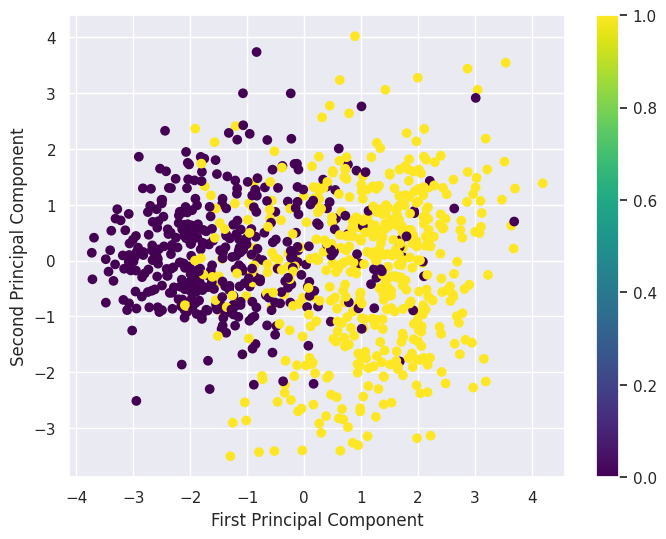

In [ ]:
#pca
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained Variance Ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()



In [ ]:
# after pca


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=True)

(734, 4) (184, 4)
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.91      0.75      0.83        85
           1       0.82      0.94      0.87        99

    accuracy                           0.85       184
   macro avg       0.87      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

Confusion Matrix:
[[64 21]
 [ 6 93]]


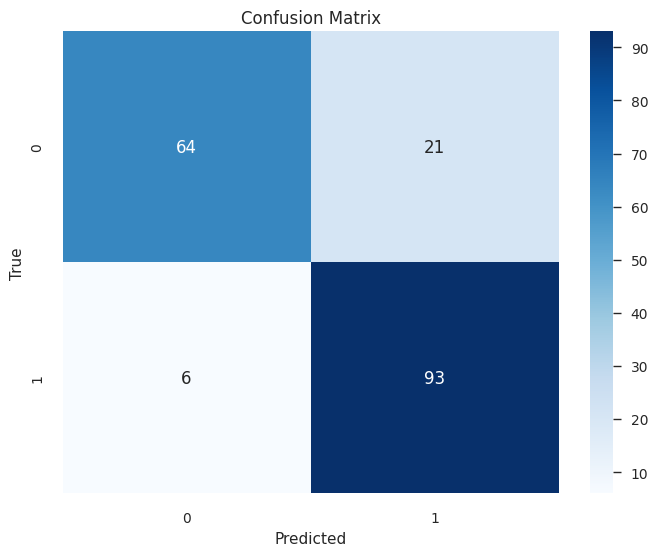

In [ ]:

#svm
svm_classifier = SVC(kernel='linear', random_state=2)
x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=20)
print(x_train.shape,x_test.shape)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

[1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0
 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1]
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        85
           1       0.87      0.85      0.86        99

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
[[72 13]
 [15 84]]


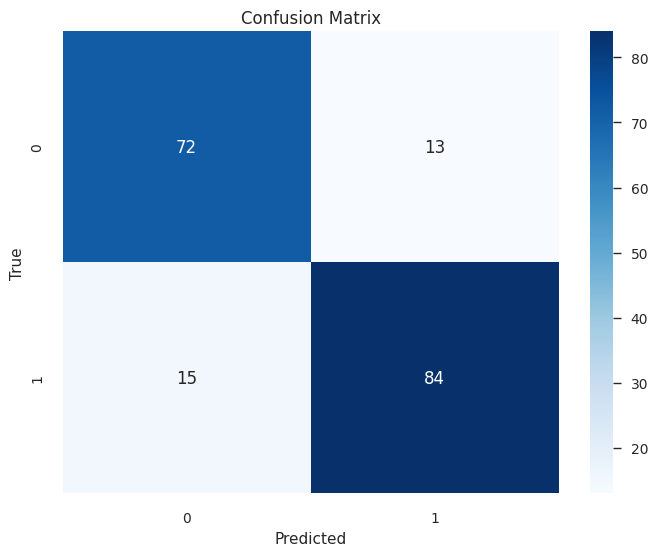

Confusion Matrix:
[[72 13]
 [15 84]]


In [ ]:
#perceptron
perceptron_model = Perceptron()
perceptron_model.fit(x_train, y_train)
y_pred = perceptron_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
    # Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

<ipython-input-55-327cb66a259d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        85
           1       0.82      0.92      0.87        99

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
[[65 20]
 [ 8 91]]


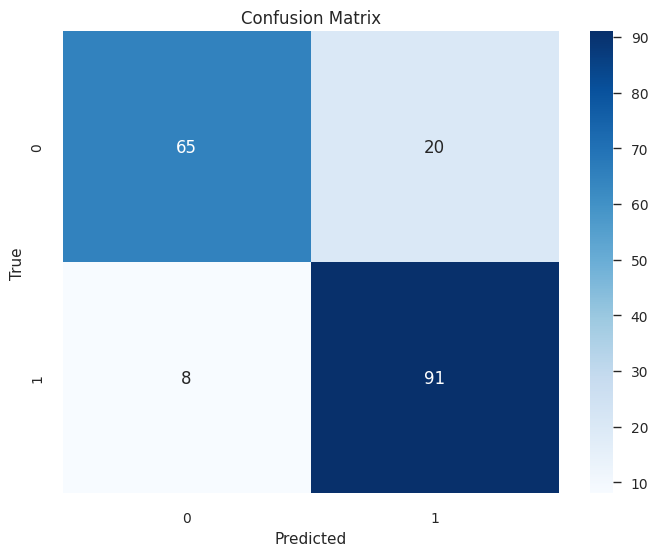

Confusion Matrix:
[[65 20]
 [ 8 91]]


In [ ]:
#logisti regression
def logistic_regression(data):
    data = data.fillna(data.mean())
    if data['HeartDisease'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print("Confusion Matrix:")
    print(cm)
logistic_regression(data)


[0.8206521739130435, 0.8804347826086957, 0.8641304347826086, 0.8804347826086957, 0.8804347826086957, 0.8913043478260869, 0.8804347826086957, 0.8967391304347826, 0.8804347826086957, 0.8858695652173914, 0.8804347826086957, 0.875, 0.875, 0.8858695652173914, 0.8858695652173914, 0.8858695652173914, 0.8858695652173914, 0.8858695652173914, 0.8858695652173914]


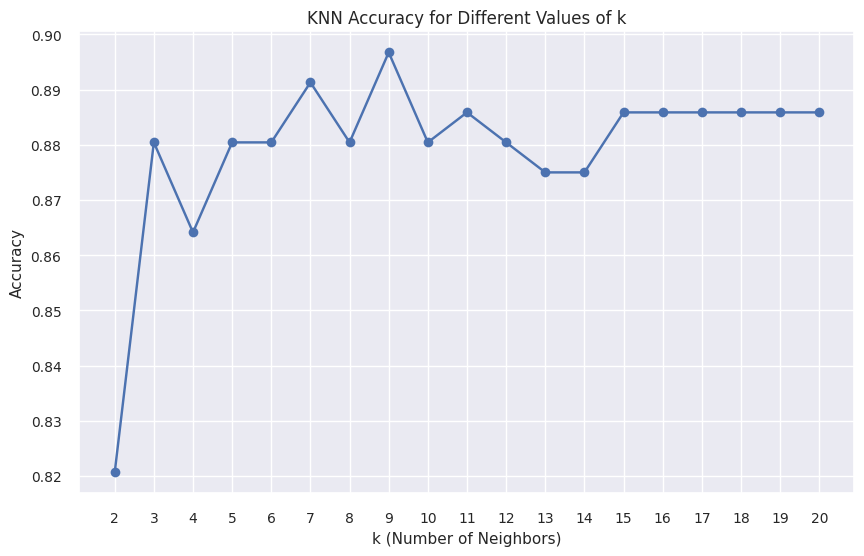

The best k value is 9 with an accuracy of 0.90
Mean Accuracy (Bootstrapped): 0.87
95% Confidence Interval: 0.84 - 0.90
Coefficient of Variation: 1.68%
Standard Deviation of Accuracy: 0.01
Mean Square Error: 0.00
The model is consistent.
Confusion Matrix:
[[ 62  12]
 [  9 101]]


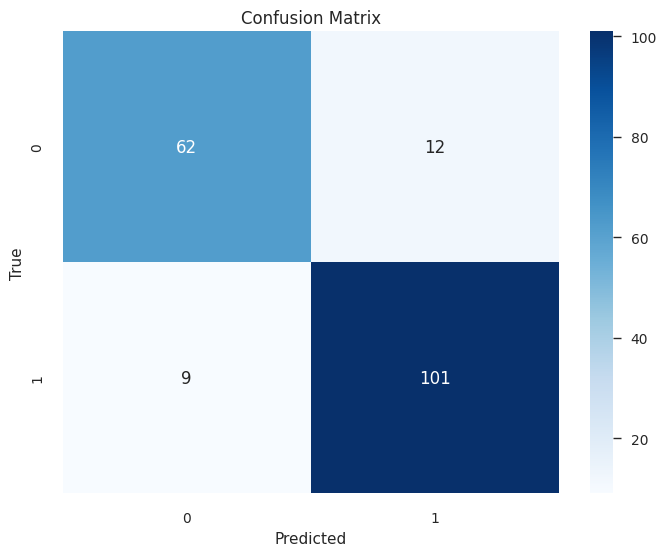

In [ ]:

#knn
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=True)
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
best_k = k_values[np.argmax(accuracy_scores)]
print(f"The best k value is {best_k} with an accuracy of {max(accuracy_scores):.2f}")
num_bootstrap_samples = 1000
accuracies = []

for _ in range(num_bootstrap_samples):
    bootstrap_indices = np.random.choice(X_train.shape[0], X_train.shape[0], replace=True)
    x_bootstrap = X_train[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]
    knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
    knn.fit(x_bootstrap, y_bootstrap)
    y_pred_bootstrap = knn.predict(X_test)
    accuracy_bootstrap = accuracy_score(y_test, y_pred_bootstrap)
    accuracies.append(accuracy_bootstrap)
mean_accuracy = np.mean(accuracies)
confidence_interval = np.percentile(accuracies, [2.5, 97.5])
print(f"Mean Accuracy (Bootstrapped): {mean_accuracy:.2f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")
coefficient_of_variation = (np.std(accuracies) / mean_accuracy) * 100
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
std_accuracy = np.std(accuracies)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")
mse = np.mean((accuracies - mean_accuracy) ** 2)
print(f"Mean Square Error: {mse:.2f}")
if std_accuracy < 0.02 and coefficient_of_variation < 5:
    print("The model is consistent.")
else:
    print("The model is not consistent.")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
